In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. Load MNIST dataset

(x_data_train, y_data_train), (x_data_test, y_data_test) = mnist.load_data()

print (x_data_train.shape)
print (y_data_train.shape)
print (x_data_test.shape)
print (y_data_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# 2. Display a sample image (index = 300) and its label

index = 300

for x in x_data_train[index]:
    for i in x:
        sys.stdout.write('%d ' % i)
    sys.stdout.write('\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 138 238 217 68 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 150 254 254 254 232 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 63 224 254 145 254 240 22 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 15 160 253 254 254 187 254 180 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 184 254 184 207 254 254 248 51 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 123 252 206 17 47 254 254 128 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 229 254 43 0 165 254 159 6 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 229 237 23 42 235 218 24 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 213 254 105 212 247 50 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 60 249 254 254 128 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 139 25

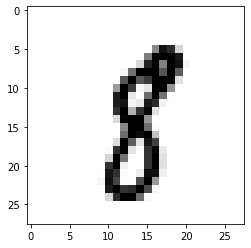

8


In [4]:
plt.imshow(x_data_train[index], cmap='Greys')
plt.show()
print (y_data_train[index])

In [5]:
# 3. Normalize the image data (0~255 → 0~1)
x_train = x_data_train.astype("float32") / 255.0
x_test = x_data_test.astype("float32") / 255.0

print (x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [6]:
# 4. One-hot encode the labels
y_train = to_categorical(y_data_train, 10)
y_test = to_categorical(y_data_test, 10)

print (y_data_test[0], y_test[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
# 5. Define MLP model using add() method

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))       # Flatten 2D image (28x28) to 1D vector (784)
model.add(Dense(128, activation='relu', name = 'hidden_1'))       # First hidden layer with 128 units
model.add(Dense(64, activation='relu', name = 'hidden_2'))        # Second hidden layer with 64 units
model.add(Dense(10, activation='softmax', name = 'output'))     # Output layer for 10 classes

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 hidden_2 (Dense)            (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 6. Compile the model

optimizer = Adam(learning_rate=0.001) 

model.compile (loss = 'categorical_crossentropy',
              optimizer = optimizer,
               metrics = ['accuracy']
              )

In [9]:
# 6. Train the model using 30% of training data as validation

learning = model.fit(x_train, y_train,
                   epochs = 30, 
                    batch_size = 32,
                    validation_split = 0.3)

Epoch 1/30
1313/1313 [==============================] - 9s 6ms/step - loss: 0.2889 - accuracy: 0.9174 - val_loss: 0.1710 - val_accuracy: 0.9498
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1219 - accuracy: 0.9634 - val_loss: 0.1268 - val_accuracy: 0.9616
Epoch 3/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0851 - accuracy: 0.9735 - val_loss: 0.1075 - val_accuracy: 0.9681
Epoch 4/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0643 - accuracy: 0.9788 - val_loss: 0.1111 - val_accuracy: 0.9679
Epoch 5/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.1040 - val_accuracy: 0.9701
Epoch 6/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.1216 - val_accuracy: 0.9678
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.1106 - val_accuracy:

In [12]:
# 모델 평가 및 예측

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 4ms/step - loss: 0.1321 - accuracy: 0.9790
Test loss: 0.1321
Test accuracy: 0.9790
